<a href="https://colab.research.google.com/github/INA-95/retail_customer_behavior_analysis/blob/main/walmart_customer_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# library

import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
file_path = "/content/drive/MyDrive/Side_Project/side_project/Walmart/walmart_data.csv"
df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Overall data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# number of unique customer
df['User_ID'].nunique()

5891

In [ ]:
# number of unique customers by gender
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
# Definition

def num_of_purchase(target_grp:list[str], cnt_col:str) -> pd.DataFrame:
    res = df.groupby(target_grp)[cnt_col].count().reset_index().rename(columns = {cnt_col:'num_of_purchase'})
    return res

def amt_of_purchase(target_grp:list[str], sum_col:str) -> pd.DataFrame:
    res = df.groupby(target_grp)[sum_col].sum().reset_index().rename(columns = {sum_col:'amt_of_purchase'})
    return res

def avg_amt_of_purchase(df1:pd.DataFrame, df2:pd.DataFrame, key:list[str]) -> pd.DataFrame:
    join_df = df1.merge(df2, how = 'inner', on = key)
    join_df['avg_amt_of_purchase'] = join_df['amt_of_purchase'] / join_df['num_of_purchase']
    return join_df

def final_viz(target_df:pd.DataFrame, idx:str, columns:str, values:str):
    final_viz = target_df.pivot(index = idx, columns = columns, values = values)
    return final_viz.plot.bar(rot=0)

<Axes: xlabel='Age'>

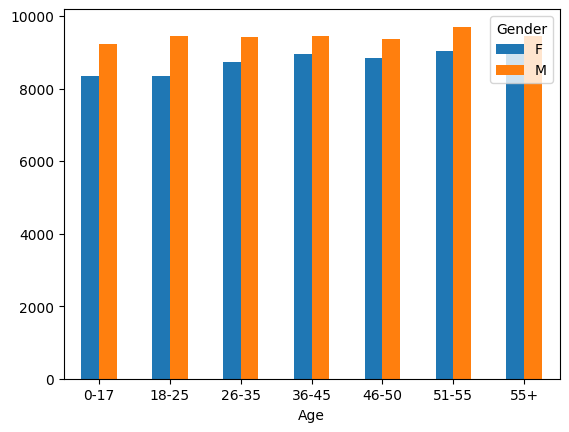

In [ ]:
# Age

target_grp = ['Age', 'Gender']
cnt_col = 'User_ID'
df1 = num_of_purchase(target_grp, cnt_col)

sum_col = 'Purchase'
df2 = amt_of_purchase(target_grp, sum_col)

join_df = avg_amt_of_purchase(df1, df2, key = ['Age', 'Gender'])

final_viz(join_df, 'Age', 'Gender', 'avg_amt_of_purchase')

<Axes: xlabel='Occupation'>

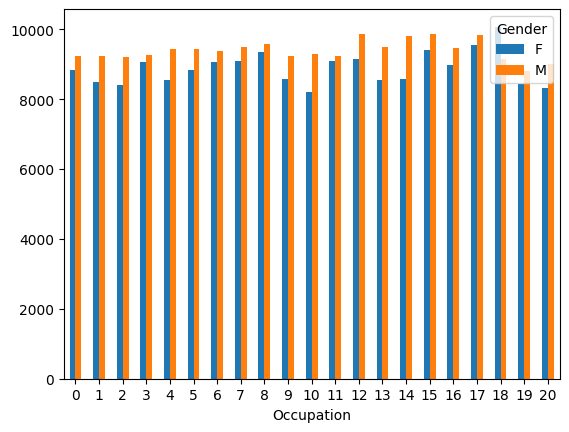

In [ ]:
# Occupation

target_grp = ['Occupation', 'Gender']
cnt_col = 'User_ID'
df1 = num_of_purchase(target_grp, cnt_col)

sum_col = 'Purchase'
df2 = amt_of_purchase(target_grp, sum_col)

join_df = avg_amt_of_purchase(df1, df2, key = ['Occupation', 'Gender'])

final_viz(join_df, 'Occupation', 'Gender', 'avg_amt_of_purchase')

<Axes: xlabel='City_Category'>

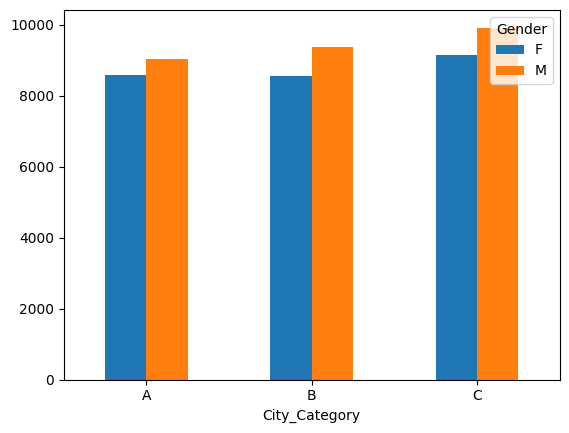

In [ ]:
# City

target_grp = ['City_Category', 'Gender']
cnt_col = 'User_ID'
df1 = num_of_purchase(target_grp, cnt_col)

sum_col = 'Purchase'
df2 = amt_of_purchase(target_grp, sum_col)

join_df = avg_amt_of_purchase(df1, df2, key = ['City_Category', 'Gender'])

final_viz(join_df, 'City_Category', 'Gender', 'avg_amt_of_purchase')

<Axes: xlabel='Marital_Status'>

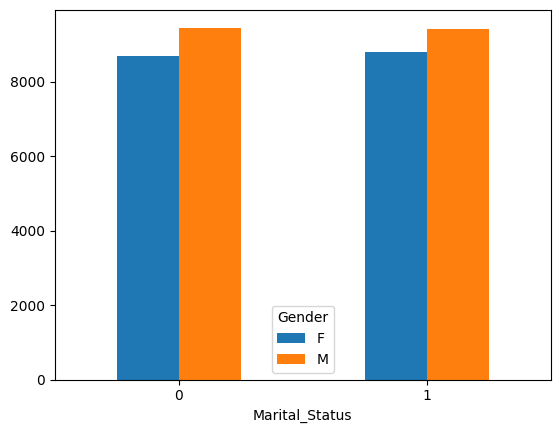

In [ ]:
# Marital status

target_grp = ['Marital_Status', 'Gender']
cnt_col = 'User_ID'
df1 = num_of_purchase(target_grp, cnt_col)

sum_col = 'Purchase'
df2 = amt_of_purchase(target_grp, sum_col)

join_df = avg_amt_of_purchase(df1, df2, key = ['Marital_Status', 'Gender'])

final_viz(join_df, 'Marital_Status', 'Gender', 'avg_amt_of_purchase')

<Axes: xlabel='Product_Category'>

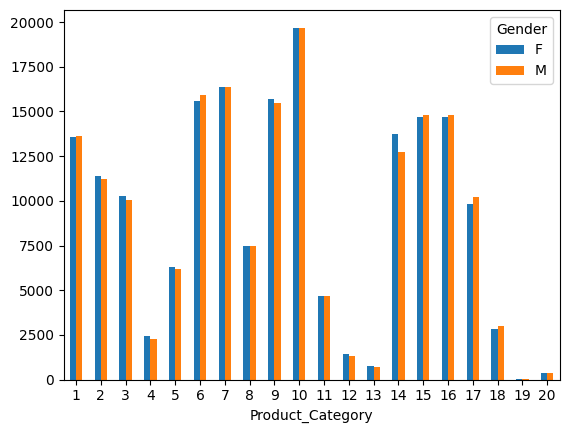

In [ ]:
# Product

target_grp = ['Product_Category', 'Gender']
cnt_col = 'User_ID'
df1 = num_of_purchase(target_grp, cnt_col)

sum_col = 'Purchase'
df2 = amt_of_purchase(target_grp, sum_col)

join_df = avg_amt_of_purchase(df1, df2, key = ['Product_Category', 'Gender'])

final_viz(join_df, 'Product_Category', 'Gender', 'avg_amt_of_purchase')